<a href="https://colab.research.google.com/github/hkolgur/UOH/blob/main/Yolo_v3_bounding_boxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

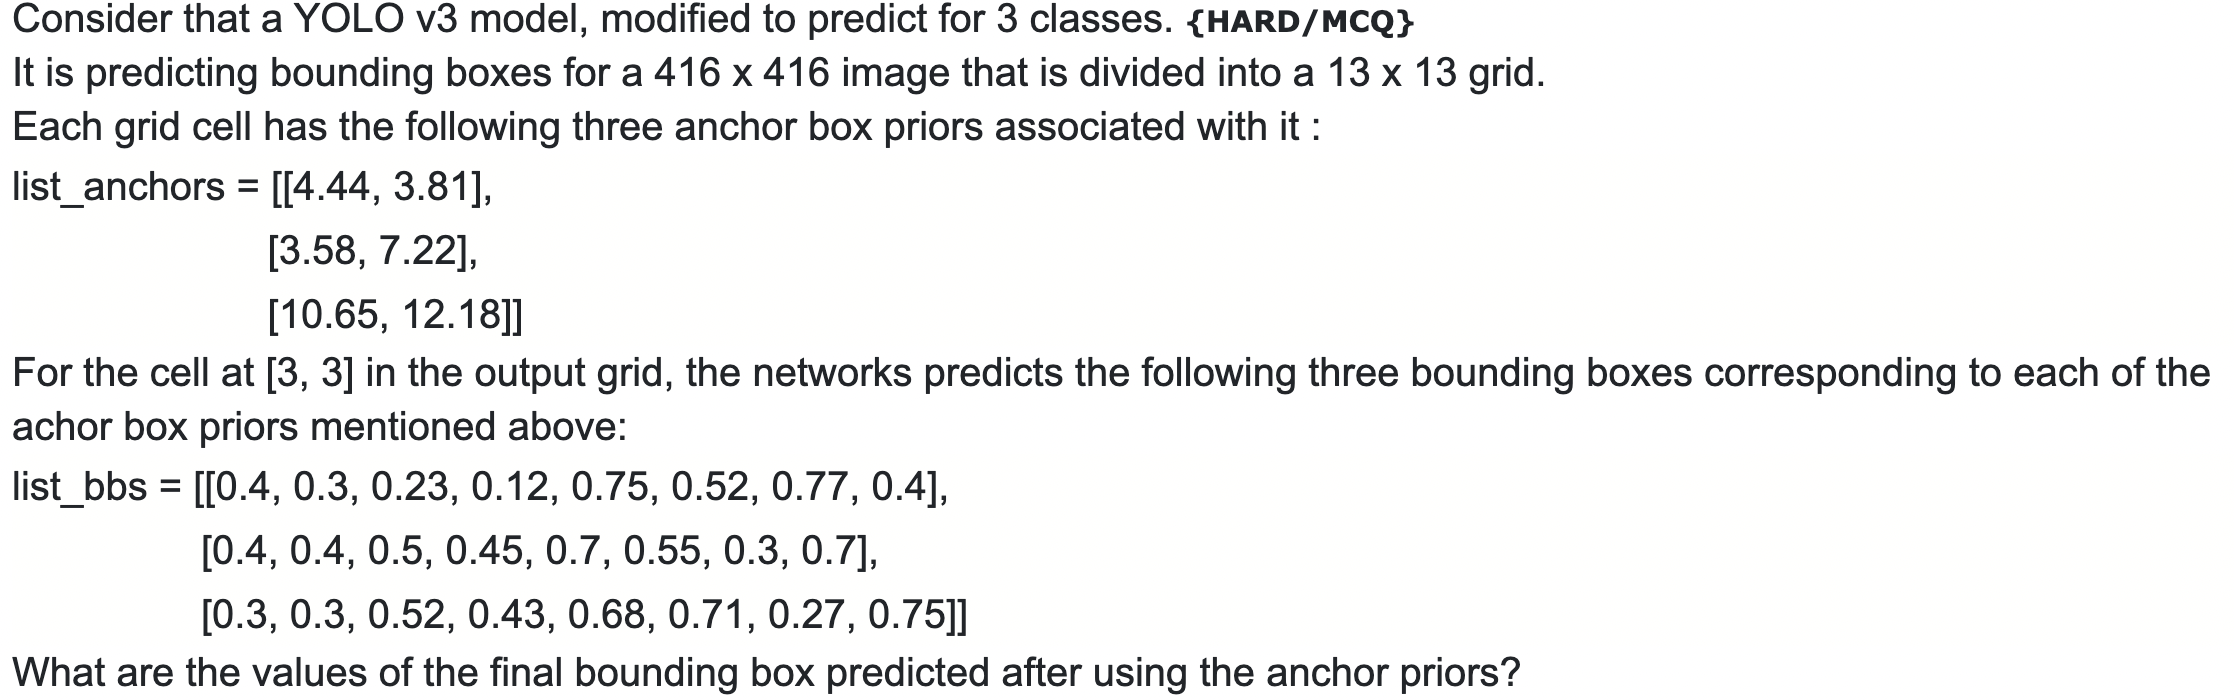


In [1]:
import numpy as np
def fn_bb_dims(cx,cy,tx,ty,tw,th,pw,ph):
  bx=1/(1+np.exp(-tx))+cx
  by=1/(1+np.exp(-ty))+cy
  bw=pw*np.exp(tw)
  bh= ph*np.exp(th)
  return [bx,by,bw,bh]

def fn_final_BB(cx,cy,list_bbs,list_anchors):
  BB_scores=[]
  for bb in list_bbs:
    obj_score=bb[4]
    class_probas=np.array(bb[5:])
    BB_score=(obj_score * class_probas).max()
    BB_scores.append(BB_score)
  idx=np.array(BB_scores).argmax()
  tx,ty,tw,th=list_bbs[idx][:4]
  pw,ph=list_anchors[idx]
  bb_dims=fn_bb_dims(cx,cy,tx,ty,tw,th,pw,ph)
  bb_probas=list_bbs[idx][4:]
  return bb_dims + bb_probas 


In [3]:
list_bbs=[[.4,.3,.23,.12,.75,.52,.77,.4],
          [.4,.4,.5,.45,.7,.55,.3,.7],
          [.3,.3,.52,.43,.68,.71,.27,.75]]

list_anchors=[[4.44,3.81],
              [3.58,7.22],
              [10.65,12.18]]
cx,cy=3,3
fn_final_BB(cx,cy,list_bbs,list_anchors)

[3.598687660112452,
 3.574442516811659,
 5.588184044086882,
 4.295763004517422,
 0.75,
 0.52,
 0.77,
 0.4]